In [1]:
# importing required modules

import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import time

In [2]:
# initialising non-quantum constants
    
j = complex(0,1)

In [3]:
# initialising quantum constants

# basis vectors
q_zero = np.array([[1] , [0]])
q_one = np.array([[0] , [1]])

# q - gates

# Pauli operators
px = np.array([[0 , 1], [1 , 0]])
py = np.array([[0 , j], [j , 0]])
pz = np.array([[1 , 0], [0 , -1]])

# Hadamard operator
h = (1/math.sqrt(2)) * np.array([[1 , 1], [1 , -1]])

# Controlled operators
cz = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]])

In [4]:
# defining basic matrix operations

def tensor_product(v, *args, **kwargs):
    result = v

    if len(kwargs) !=0 :
        for i in range(kwargs['n'] - 1):
            result = np.kron(result, v)
    
    else:
        for arg in args:
            result = np.kron(result, arg)

    return result

In [5]:
# Grovers algorithm for n qubit system to find k (N =)

class Grovers:
    def __init__(self, k, N = 2):
        self.n = math.ceil(math.log2(N))
        self.iters = int((math.pi/ 4) * math.sqrt(2**self.n))
        self.oracle = np.identity(2**self.n)
        self.oracle[k][k] = -self.oracle[k][k]
    
    def superpose(self):
        nh = tensor_product(h, n = self.n)
        self.psi = np.dot(nh, tensor_product(q_zero, n = self.n))
        self.psi_copy = self.psi
        self.amplify = 2 * np.dot(self.psi_copy, self.psi_copy.conjugate().T) - \
        np.identity(2**self.n)
        return self.psi    
    
    def grover_search(self):
        for _ in range(self.iters):
            flip = np.dot(self.oracle, self.psi)
            self.psi = np.dot(self.amplify, flip)
        return self.psi
    
    # In development !
    def plot_bar(self):
        x = [str(int(i)) for i in range(2**self.n)]
        y_amp = self.psi.T.reshape(2**self.n,)
        y_pb = y_amp **2
        plt.ylabel('Probalility')
        plt.xlabel('Indexes')
        plt.title('Probability of finding ...')
        plt.bar(x, y_pb)
        plt.show()

In [6]:
grov = Grovers(15, N = 2**5)
grov.superpose()

start = time.time()
res = grov.grover_search()
end = time.time()

print('Probabilities: \n', (res**2).T)
print('\nIterations: ', grov.iters)
print('Time: ', end-start )

Probabilities: 
 [[2.63769180e-05 2.63769180e-05 2.63769180e-05 2.63769180e-05
  2.63769180e-05 2.63769180e-05 2.63769180e-05 2.63769180e-05
  2.63769180e-05 2.63769180e-05 2.63769180e-05 2.63769180e-05
  2.63769180e-05 2.63769180e-05 2.63769180e-05 9.99182316e-01
  2.63769180e-05 2.63769180e-05 2.63769180e-05 2.63769180e-05
  2.63769180e-05 2.63769180e-05 2.63769180e-05 2.63769180e-05
  2.63769180e-05 2.63769180e-05 2.63769180e-05 2.63769180e-05
  2.63769180e-05 2.63769180e-05 2.63769180e-05 2.63769180e-05]]

Iterations:  4
Time:  0.0010008811950683594


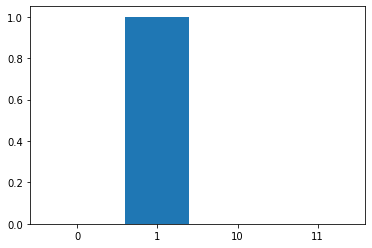

In [7]:
# Grovers algorithm for two qubit system

diffusion = np.dot(cz, tensor_product(pz, pz))
nh = tensor_product(h, n=2)

# Step 1: uniform superposition
s = np.dot(nh, tensor_product(q_zero, n=2))

# Step 2: Oracle for state |01>
Uw = np.array([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
psi = np.dot(Uw, s)

# Step 3: Amplitude amplification

Us = np.dot(nh, np.dot(diffusion, nh))

# Us = 2 * np.dot(s, s.T) - np.identity(4)
amplitudes = np.dot(Us, psi)

# Plot
plt.bar([bin(i)[2:] for i in range(4)], amplitudes.T.reshape(4,)**2)
plt.show()

Time taken:   0.0009996891021728516


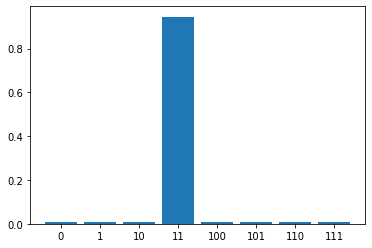

In [8]:
# Grovers algorithm for three qubit system

nh = tensor_product(h, n=3)

# Step 1: uniform superposition
s = np.dot(nh, tensor_product(q_zero, n=3))

# Oracle for w = |011>
Uw = np.identity(8)
Uw[3] = Uw[3] * -1

start = time.time()

# Step 2: Grovers iteration
for i in range(2):
    # Applying orcacle
    psi = np.dot(Uw, s)

    # Grovers operator
    avg = np.sum(psi) / 8
    s = 2 * avg - psi 
    # amplitudes = np.dot(Us, psi)

end = time.time()

amplitudes = s
print('Time taken:  ', end - start)

# Plot
plt.bar([bin(i)[2:] for i in range(8)], amplitudes.T.reshape(8,)**2)
plt.show()